<h1 style="color: #fcd805">Exercise: APIs</h1>

1. Every endpoint in the Star Wars API supports searching. Read the documentation at https://swapi.dev/documentation#search and see if you can search the database to find **Darth Vader's height**.

In [1]:
import requests

url = "https://swapi.dev/api/people/?search=darth"

response = requests.get(url)
response.raise_for_status()

In [2]:
darth = response.json()
darth["results"][0]["height"]

'202'

2. Find the **endpoint** (i.e. the specific url) responsible for returning data about starships.

Use this endpoint to search the database and find the Millennium Falcon.

What is its **cargo capacity**?

In [3]:
url = "https://swapi.dev/api/starships?search=millennium"

response = requests.get(url)
response.raise_for_status()

In [4]:
falcon = response.json()
falcon["results"][0]["cargo_capacity"]

'100000'

3. Every starship record contains links to its pilots. Find the characters who have piloted the Millennium Falcon and print their names.

*Hint: you may need to make further API calls...!*

In [5]:
pilots = falcon["results"][0]["pilots"]

pilots

['https://swapi.dev/api/people/13/',
 'https://swapi.dev/api/people/14/',
 'https://swapi.dev/api/people/25/',
 'https://swapi.dev/api/people/31/']

In [6]:
for pilot in pilots:
    person_request = requests.get(pilot)
    person_request.raise_for_status()
    person = person_request.json()
    print(person["name"])

Chewbacca
Han Solo
Lando Calrissian
Nien Nunb


<h1 style="color: #fcd805">Exercise: APIs and `pandas`</h1>

We're going to explore a new API, which exposes data about the Nobel Prize.

The API documentation is here: [https://app.swaggerhub.com/apis/NobelMedia/NobelMasterData/2.0](https://app.swaggerhub.com/apis/NobelMedia/NobelMasterData/2.0)

(the developer Hub is here: [https://www.nobelprize.org/organization/developer-zone-2](https://www.nobelprize.org/organization/developer-zone-2))

The url to retrieve information about prizes is [https://api.nobelprize.org/2.1/nobelPrizes](https://api.nobelprize.org/2.1/nobelPrizes).

1. Look at the documentation to figure out how to modify the url to get Nobel prizes for a particular year. Construct a url to retrieve prizes from 2019.

Call this url using `requests` to get a response.

In [7]:
prize_response = requests.get("https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear=2019")

prize_response.raise_for_status()

2. Convert the response to a Python object. How many prizes were awarded in 2019?

_Hint: look at the response and find the right dictionary key to answer the question. If you're not sure, start with the `.keys()` in the dictionary._

In [8]:
prizes_json = prize_response.json()

prizes_json.keys()

dict_keys(['nobelPrizes', 'meta', 'links'])

In [9]:
prizes_json["meta"]

{'offset': 0,
 'limit': 25,
 'nobelPrizeYear': 2019,
 'count': 6,
 'terms': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/',
 'license': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/#licence',
 'disclaimer': 'https://www.nobelprize.org/about/terms-of-use-for-api-nobelprize-org-and-data-nobelprize-org/#disclaimer'}

In [10]:
prizes_json["meta"]["count"]

6

3. Find the right dictionary key within the returned result to retrieve the prizes as a list. Convert these to a `pandas` DataFrame.

Did you get the same number as before?

In [11]:
import pandas as pd

prizes = prizes_json["nobelPrizes"]

prize_df = pd.DataFrame(prizes)
print(prize_df.shape)
prize_df.head()

(6, 9)


,awardYear,category,categoryFullName,dateAwarded,prizeAmount,prizeAmountAdjusted,links,laureates,topMotivation
0,2019,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",2019-10-09,9000000,10013620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '976', 'knownName': {'en': 'John B. Go...",NaN
1,2019,"{'en': 'Economic Sciences', 'no': 'Økonomi', '...",{'en': 'The Sveriges Riksbank Prize in Economi...,2019-10-14,9000000,10013620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '982', 'knownName': {'en': 'Abhijit Ba...",NaN
2,2019,"{'en': 'Literature', 'no': 'Litteratur', 'se':...","{'en': 'The Nobel Prize in Literature', 'no': ...",2019-10-10,9000000,10013620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '980', 'knownName': {'en': 'Peter Hand...",NaN
3,2019,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",2019-10-11,9000000,10013620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '981', 'knownName': {'en': 'Abiy Ahmed...",NaN
4,2019,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",2019-10-08,9000000,10013620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '973', 'knownName': {'en': 'James Peeb...",{'en': 'for contributions to our understanding...


Time for a research question:

### How has the awarded prize amount changed over time?

4. First, write a loop to repeat your code above (fetching data from the API and saving the results into a DataFrame) for each year from 1990 to 2024.

For each year:

- construct the right url for that year
- download the results, convert to Python objects, and put the Nobel prize data into a DataFrame
- collect all these `pandas` DataFrames into a list

At the end of your loop you should have a list of `pandas` DataFrames.

In [12]:
import time

prize_df_list = []

for year in range(1990, 2025):
    print(year)
    prizes = pd.DataFrame(requests.get(f"https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeYear={year}").json()["nobelPrizes"])
    
    prize_df_list.append(prizes)
    
    time.sleep(0.5) # a courtesy :-)

1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


5. Use the `.concat()` method to combine your DataFrames into a single DataFrame.

How many prizes do you have in your data?

In [13]:
prizes_all = pd.concat(prize_df_list, ignore_index=True)
print(prizes_all.shape)
prizes_all.head()

(210, 9)


,awardYear,category,categoryFullName,dateAwarded,prizeAmount,prizeAmountAdjusted,links,laureates,topMotivation
0,1990,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '275', 'knownName': {'en': 'Elias Jame...",NaN
1,1990,"{'en': 'Economic Sciences', 'no': 'Økonomi', '...",{'en': 'The Sveriges Riksbank Prize in Economi...,1990-10-16,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '704', 'knownName': {'en': 'Harry M. M...",NaN
2,1990,"{'en': 'Literature', 'no': 'Litteratur', 'se':...","{'en': 'The Nobel Prize in Literature', 'no': ...",1990-10-11,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '667', 'knownName': {'en': 'Octavio Pa...",NaN
3,1990,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",1990-10-15,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '552', 'knownName': {'en': 'Mikhail Go...",NaN
4,1990,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '138', 'knownName': {'en': 'Jerome I. ...",NaN


6. For each year, calculate the average prize amount.

Plot the result as a line chart.

What do you conclude?

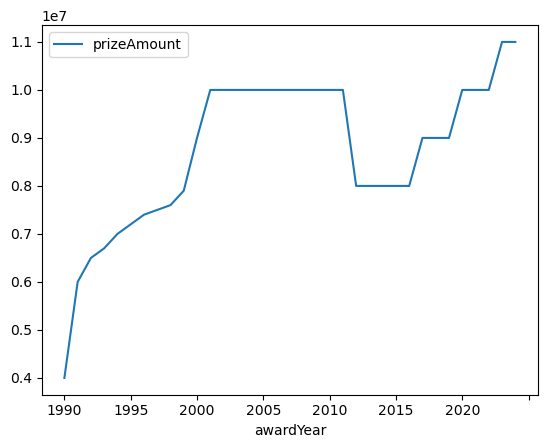

In [14]:
_ = (
    prizes_all
    .groupby("awardYear")
    [["prizeAmount"]]
    .mean()
    .plot()
)

7. Now plot the amount *adjusted for inflation* (there is a separate column for this).

What do you notice?

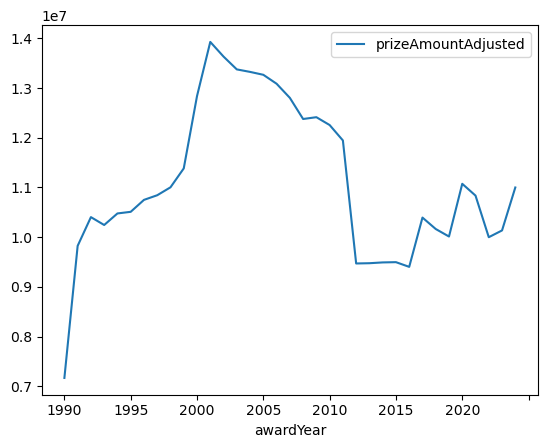

In [15]:
_ = (
    prizes_all
    .groupby("awardYear")
    [["prizeAmountAdjusted"]]
    .mean()
    .plot()
)

Note: by including both columns at once you can plot both lines!

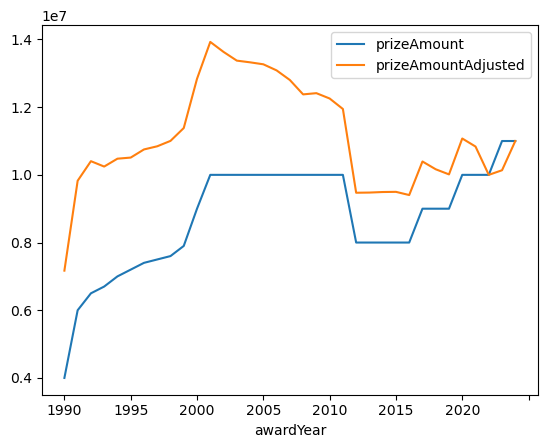

In [24]:
_ = (
    prizes_all
    .groupby("awardYear")
    [["prizeAmount", "prizeAmountAdjusted"]]
    .mean()
    .plot()
)

### *BONUS*

Another research question:

#### Which Nobel prizes are typically awarded to *multiple* people?

8. First, using the `laureates` column, create a new column containing a count of how many people won a given prize in a given year (the items in `laureates` should be a list, count the items in the list and store the value as a new column).

In [16]:
prizes_all["n_laureates"] = prizes_all["laureates"].apply(len)
prizes_all.head()

,awardYear,category,categoryFullName,dateAwarded,prizeAmount,prizeAmountAdjusted,links,laureates,topMotivation,n_laureates
0,1990,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '275', 'knownName': {'en': 'Elias Jame...",NaN,1
1,1990,"{'en': 'Economic Sciences', 'no': 'Økonomi', '...",{'en': 'The Sveriges Riksbank Prize in Economi...,1990-10-16,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '704', 'knownName': {'en': 'Harry M. M...",NaN,3
2,1990,"{'en': 'Literature', 'no': 'Litteratur', 'se':...","{'en': 'The Nobel Prize in Literature', 'no': ...",1990-10-11,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '667', 'knownName': {'en': 'Octavio Pa...",NaN,1
3,1990,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",1990-10-15,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '552', 'knownName': {'en': 'Mikhail Go...",NaN,1
4,1990,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '138', 'knownName': {'en': 'Jerome I. ...",NaN,3


9. Each record contains more information in a nested format. Expand the `category` column to enhance your data with the English name of the prize category (e.g. peace, physics etc.).

In [17]:
prizes_all["category_name"] = pd.json_normalize(prizes_all["category"])["en"]
prizes_all.head()

,awardYear,category,categoryFullName,dateAwarded,prizeAmount,prizeAmountAdjusted,links,laureates,topMotivation,n_laureates,category_name
0,1990,"{'en': 'Chemistry', 'no': 'Kjemi', 'se': 'Kemi'}","{'en': 'The Nobel Prize in Chemistry', 'no': '...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '275', 'knownName': {'en': 'Elias Jame...",NaN,1,Chemistry
1,1990,"{'en': 'Economic Sciences', 'no': 'Økonomi', '...",{'en': 'The Sveriges Riksbank Prize in Economi...,1990-10-16,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '704', 'knownName': {'en': 'Harry M. M...",NaN,3,Economic Sciences
2,1990,"{'en': 'Literature', 'no': 'Litteratur', 'se':...","{'en': 'The Nobel Prize in Literature', 'no': ...",1990-10-11,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '667', 'knownName': {'en': 'Octavio Pa...",NaN,1,Literature
3,1990,"{'en': 'Peace', 'no': 'Fred', 'se': 'Fred'}","{'en': 'The Nobel Peace Prize', 'no': 'Nobels ...",1990-10-15,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '552', 'knownName': {'en': 'Mikhail Go...",NaN,1,Peace
4,1990,"{'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'}","{'en': 'The Nobel Prize in Physics', 'no': 'No...",1990-10-17,4000000,7169620,"[{'rel': 'nobelPrize', 'href': 'https://api.no...","[{'id': '138', 'knownName': {'en': 'Jerome I. ...",NaN,3,Physics


10. Now calculate the average number of laureates per prize category.

Plot the results as a bar chart.

What do you conclude?

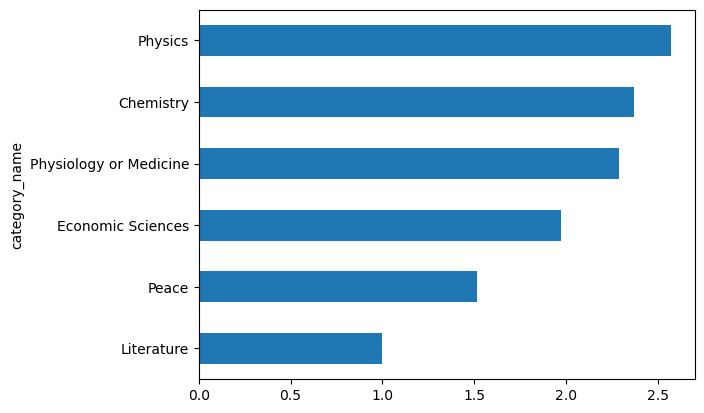

In [18]:
_ = (
    prizes_all
    .groupby("category_name")
    ["n_laureates"]
    .mean()
    .sort_values()
    .plot.barh()
)

Looks like science is more of a team sport than peace or literature!

<h1 style="color: #fcd805">Exercise: web scraping</h1>

Your turn to scrape some data from the bookshop!

We're going to extract all the prices from the page and calculate the average book price.

1. Inspect the web page. What makes each book price element unique?

_Hint: right-click and click Inspect to view the HTML behind an element on the page._

_Every price element is inside a `<p>` tag with class "price_color"_

2. Use `BeautifulSoup` to select all the elements that show a book's price.

In [19]:
from bs4 import BeautifulSoup

bookstore_response = requests.get("http://books.toscrape.com/")

bookstore_response.raise_for_status()

soup = BeautifulSoup(bookstore_response.text, "html.parser")

price_tags = soup.select("p.price_color")
price_tags

[<p class="price_color">Â£51.77</p>,
 <p class="price_color">Â£53.74</p>,
 <p class="price_color">Â£50.10</p>,
 <p class="price_color">Â£47.82</p>,
 <p class="price_color">Â£54.23</p>,
 <p class="price_color">Â£22.65</p>,
 <p class="price_color">Â£33.34</p>,
 <p class="price_color">Â£17.93</p>,
 <p class="price_color">Â£22.60</p>,
 <p class="price_color">Â£52.15</p>,
 <p class="price_color">Â£13.99</p>,
 <p class="price_color">Â£20.66</p>,
 <p class="price_color">Â£17.46</p>,
 <p class="price_color">Â£52.29</p>,
 <p class="price_color">Â£35.02</p>,
 <p class="price_color">Â£57.25</p>,
 <p class="price_color">Â£23.88</p>,
 <p class="price_color">Â£37.59</p>,
 <p class="price_color">Â£51.33</p>,
 <p class="price_color">Â£45.17</p>]

3. Extract only the displayed text from these elements into a list.

You should end up with a list of strings.

In [20]:
prices = [tag.text for tag in price_tags]
prices

['Â£51.77',
 'Â£53.74',
 'Â£50.10',
 'Â£47.82',
 'Â£54.23',
 'Â£22.65',
 'Â£33.34',
 'Â£17.93',
 'Â£22.60',
 'Â£52.15',
 'Â£13.99',
 'Â£20.66',
 'Â£17.46',
 'Â£52.29',
 'Â£35.02',
 'Â£57.25',
 'Â£23.88',
 'Â£37.59',
 'Â£51.33',
 'Â£45.17']

4. Create a `pandas` `Series` from this list of strings by using `pd.Series`.

In [21]:
price_series = pd.Series(prices)

5. Using your `pandas` knowledge, clean up these strings so they are just numeric prices, and convert the `Series` to be a numeric type.

In [22]:
price_series = price_series.str[2:].astype(float)
price_series

0     51.77
1     53.74
2     50.10
3     47.82
4     54.23
5     22.65
6     33.34
7     17.93
8     22.60
9     52.15
10    13.99
11    20.66
12    17.46
13    52.29
14    35.02
15    57.25
16    23.88
17    37.59
18    51.33
19    45.17
dtype: float64

6. Now calculate the average price of books on the web page.

In [23]:
print(price_series.mean(), price_series.median())

38.048500000000004 41.38
